# The code for generating signal with anomaly events

[713, 744, 1356, 1566, 2462, 2598, 3029, 3232, 4984, 5046, 5189, 5282, 6379, 6448, 6802, 7257, 7921, 8134, 9288, 9913]


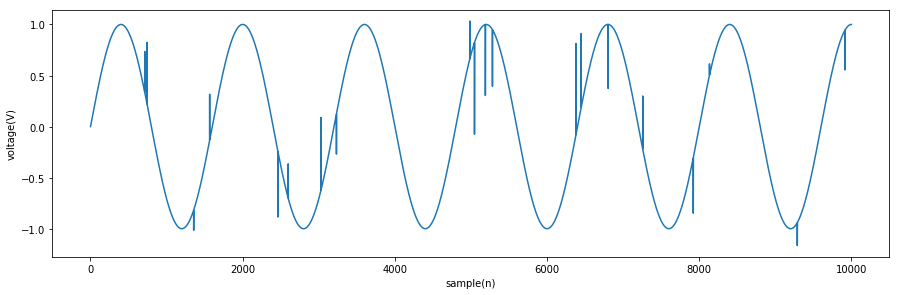

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
import csv
from sklearn import svm

n_anomalies=20
nameOftheFile="Simulated_anomaly_data.csv"
Fs = 8000
f = 5
sample = 10000
x = np.arange(sample)
target = np.sin(2* np.pi * f * x / Fs)
modified=target
random=np.random.uniform(low=-0.9, high=0.9, size=(n_anomalies))
randomLoc=np.random.uniform(low=0, high=10000, size=(n_anomalies))
intRandomLoc=[]

for idx,val in enumerate (randomLoc):
    intRandomLoc.append(int(randomLoc[idx]))
intRandomLoc.sort()
print(intRandomLoc)
    
for idx,val in enumerate (intRandomLoc):
    modified[val]=target[val]+random[idx]     

with open(nameOftheFile, "w") as csvfile:
    fieldnames = ['Measured_value', 'sample','target_val']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames,lineterminator = '\n')
    writer.writeheader()
    
    for idx,value in enumerate (modified):
        writer.writerow({'Measured_value':value, 'sample':idx, 'target_val':target[idx]})

##########################PLOTING################################
plt.figure(figsize=(15,10))

plt.subplot(2, 1, 1)
plt.plot(x, modified)
plt.xlabel('sample(n)')
plt.ylabel('voltage(V)')


plt.show()